In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv as besselk
from scipy.linalg import eigh


# 设置参数
d = 100          # 特征维度
p = 2             # 子空间维度
alpha = 8         # 采样比 alpha
n = int(d * alpha)
np.random.seed(42)

# Step 1: 生成正交信号子空间 W_star ∈ ℝ^{d×p}
W_star = np.random.randn(d, p)
W_star, _ = np.linalg.qr(W_star)

# Step 2: 生成输入样本 X ∈ ℝ^{n×d}
X = np.random.randn(n, d) / np.sqrt(d)

# Step 3: 隐变量 Z = X @ W_star, Z ∈ ℝ^{n×p}
Z = X @ W_star
z1, z2 = Z[:, 0], Z[:, 1]

# Step 4: 构造非线性响应 y = z1 * z2
y = z1 * z2

# Step 5: 构造 G(y), 然后计算 T(y) = G(G + I)^-1
def compute_T_y_bessel(y_batch):
    abs_y = np.abs(y_batch)
    K1 = besselk(1, abs_y)
    K0 = besselk(0, abs_y)
    with np.errstate(divide='ignore', invalid='ignore'):
        lambda_y = abs_y * (K1 / K0)
        lambda_y[np.isnan(lambda_y)] = 0.0
        lambda_y[np.isinf(lambda_y)] = 0.0

    T_list = []
    for i in range(len(y_batch)):
        y_i = y_batch[i]
        lam = lambda_y[i]
        G = np.array([[lam, y_i],
                      [y_i, lam]])
        T_i = G @ np.linalg.inv(G + np.eye(2))
        T_list.append(T_i)
    return np.array(T_list)  # (n, 2, 2)

T_y = compute_T_y_bessel(y)

# Step 6: 构造谱矩阵 T_hat ∈ ℝ^{2d×2d}
T_matrix = np.zeros((2 * d, 2 * d))

batch_size = 500
for i in range(0, n, batch_size):
    X_batch = X[i:i+batch_size]              # (B, d)
    T_batch = T_y[i:i+batch_size]            # (B, 2, 2)

    for j in range(len(X_batch)):
        xi = X_batch[j]
        Ti = T_batch[j]
        kron = np.kron(np.outer(xi, xi), Ti)  # (2d, 2d)
        T_matrix += kron

T_matrix /= n



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 假设你已有这些变量
# eigvals：特征值数组（升序）
# alpha, p：采样比与信号维度
lambda_s = 9.70161885e-09
lambda_b = 9.23452852e-9
alpha = 8.0
p = 2


# 设置颜色
bulk_color = '#2878B5'     # 蓝紫色
signal_color = 'green'     # 信号柱子绿色

# Step 1: 计算 histogram 数据
hist, bin_edges = np.histogram(eigvals, bins=200, density=True)
bin_width = bin_edges[1] - bin_edges[0]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 2: 找到最大 24 个特征值所在的 bin 索引
eigvals_sorted = np.sort(eigvals)
signal_eigs = eigvals_sorted[-2:]  # 可改为 -4 表示4个
signal_bins = set(np.digitize(signal_eigs, bin_edges) - 1)

# Step 3: 绘图
plt.figure(figsize=(6, 4))

for i in range(len(hist)):
    color = signal_color if i in signal_bins else bulk_color
    plt.bar(bin_centers[i], hist[i], width=bin_width, color=color, alpha=0.85)

# Step 4: 添加竖线
plt.axvline(lambda_s, color='#36E072', linestyle='--', linewidth=2, label=r'$\lambda_s$')
plt.axvline(lambda_b, color='#85A7E7', linestyle='--', linewidth=2, label=r'$\lambda_b$')

# Step 5: 其他设置
plt.yscale('log')
plt.title(r"Spectral Density of $T$, $g(z1,z2) = z1z2$, $\alpha = {:.1f}$, $p = {}$".format(alpha, p))
plt.xlabel("Eigenvalue")
plt.ylabel("Log Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()


from matplotlib.ticker import ScalarFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Step 7: 显示图像
plt.tight_layout()
plt.show()


NameError: name 'eigvals' is not defined

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv as besselk
from scipy.linalg import eigh


# 设置参数
d = 5000          # 特征维度
p = 2             # 子空间维度
alpha = 8         # 采样比 alpha
n = int(d * alpha)
np.random.seed(42)

# Step 1: 生成正交信号子空间 W_star ∈ ℝ^{d×p}
W_star = np.random.randn(d, p)
W_star, _ = np.linalg.qr(W_star)

# Step 2: 生成输入样本 X ∈ ℝ^{n×d}
X = np.random.randn(n, d) / np.sqrt(d)

# Step 3: 隐变量 Z = X @ W_star, Z ∈ ℝ^{n×p}
Z = X @ W_star
z1, z2 = Z[:, 0], Z[:, 1]

# Step 4: 构造非线性响应 y = z1 * z2
y = z1 * z2

# Step 5: 构造 G(y), 然后计算 T(y) = G(G + I)^-1
def compute_T_y_bessel(y_batch):
    abs_y = np.abs(y_batch)
    K1 = besselk(1, abs_y)
    K0 = besselk(0, abs_y)
    with np.errstate(divide='ignore', invalid='ignore'):
        lambda_y = abs_y * (K1 / K0)
        lambda_y[np.isnan(lambda_y)] = 0.0
        lambda_y[np.isinf(lambda_y)] = 0.0

    T_list = []
    for i in range(len(y_batch)):
        y_i = y_batch[i]
        lam = lambda_y[i]
        G = np.array([[lam, y_i],
                      [y_i, lam]])
        T_i = G @ np.linalg.inv(G + np.eye(2))
        T_list.append(T_i)
    return np.array(T_list)  # (n, 2, 2)

T_y = compute_T_y_bessel(y)

# Step 6: 更高效地构造 T_hat ∈ ℝ^{2d×2d}
T_matrix = np.zeros((2 * d, 2 * d))

for i in range(n):
    xi = X[i]  # shape: (d,)
    Ti = T_y[i]  # shape: (2,2)

    # 逐元素手动构造 Kronecker 的加和（比 np.kron 快很多）
    # 构造 A = xi xi^T ∈ ℝ^{d×d}
    A = np.outer(xi, xi)

    # 构造最终 (2d × 2d) 矩阵（按块填充）
    T_matrix[0:d, 0:d]     += Ti[0, 0] * A
    T_matrix[0:d, d:2*d]   += Ti[0, 1] * A
    T_matrix[d:2*d, 0:d]   += Ti[1, 0] * A
    T_matrix[d:2*d, d:2*d] += Ti[1, 1] * A

T_matrix /= n


KeyboardInterrupt: 

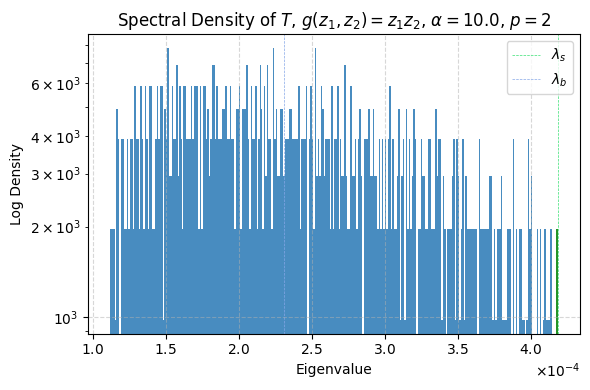

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv as besselk
from scipy.linalg import eigh
from matplotlib.ticker import ScalarFormatter


def compute_T_y_bessel(y_batch):
    abs_y = np.abs(y_batch)
    K1 = besselk(1, abs_y)
    K0 = besselk(0, abs_y)
    with np.errstate(divide='ignore', invalid='ignore'):
        lambda_y = abs_y * (K1 / K0)
        lambda_y[np.isnan(lambda_y)] = 0.0
        lambda_y[np.isinf(lambda_y)] = 0.0

    T_list = []
    for i in range(len(y_batch)):
        y_i = y_batch[i]
        lam = lambda_y[i]
        G = np.array([[lam, y_i],
                      [y_i, lam]])
        T_i = G @ np.linalg.inv(G + np.eye(2))
        T_list.append(T_i)
    return np.array(T_list)  # shape: (n, 2, 2)


def build_T_hat(X, T_y):
    n, d = X.shape
    T_matrix = np.zeros((2 * d, 2 * d))
    for i in range(n):
        xi = X[i]  # (d,)
        Ti = T_y[i]  # (2,2)
        A = np.outer(xi, xi)  # (d,d)

        # 手动构造 Kronecker 加和
        T_matrix[0:d, 0:d]     += Ti[0, 0] * A
        T_matrix[0:d, d:2*d]   += Ti[0, 1] * A
        T_matrix[d:2*d, 0:d]   += Ti[1, 0] * A
        T_matrix[d:2*d, d:2*d] += Ti[1, 1] * A
    T_matrix /= n
    return T_matrix


def plot_spectrum(eigvals, alpha, p, signal_top=2, lambda_s=None, lambda_b=None, save_path=None):
    bulk_color = '#2878B5'
    signal_color = 'green'

    # Histogram
    hist, bin_edges = np.histogram(eigvals, bins=300, density=True)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    eigvals_sorted = np.sort(eigvals)
    signal_eigs = eigvals_sorted[-signal_top:]
    signal_bins = set(np.digitize(signal_eigs, bin_edges) - 1)

    # Plot
    plt.figure(figsize=(6, 4))
    for i in range(len(hist)):
        color = signal_color if i in signal_bins else bulk_color
        plt.bar(bin_centers[i], hist[i], width=bin_width, color=color, alpha=0.85)

    if lambda_s is not None:
        plt.axvline(lambda_s, color='#36E072', linestyle='--', linewidth=0.5, label=r'$\lambda_s$')
    if lambda_b is not None:
        plt.axvline(lambda_b, color='#85A7E7', linestyle='--', linewidth=0.5, label=r'$\lambda_b$')

    plt.yscale('log')
    plt.title(r"Spectral Density of $T$, $g(z_1,z_2) = z_1 z_2$, $\alpha = {:.1f}$, $p = {}$".format(alpha, p))
    plt.xlabel("Eigenvalue")
    plt.ylabel("Log Density")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()


def main():
    # 参数设置
    d = 500
    p = 2
    alpha = 10
    n = int(d * alpha)
    np.random.seed(42)

    # Step 1-4: 生成数据
    W_star = np.random.randn(d, p)
    W_star, _ = np.linalg.qr(W_star)
    X = np.random.randn(n, d) / np.sqrt(d)
    Z = X @ W_star
    z1, z2 = Z[:, 0], Z[:, 1]
    y = z1 * z2

    # Step 5-6: 构造 T(y) 和 T_hat
    T_y = compute_T_y_bessel(y)
    T_hat = build_T_hat(X, T_y)

    # Step 7: 特征分解
    eigvals = eigh(T_hat, eigvals_only=True)

    # Step 8: 绘图
    lambda_s = eigvals[-1]
    lambda_b = eigvals[d - 1]  # bulk 边缘
    plot_spectrum(eigvals, alpha=alpha, p=p, lambda_s=lambda_s, lambda_b=lambda_b)


if __name__ == "__main__":
    main()


In [12]:
print("Top 2 eigenvalues (λ_s):", lambda_s)


Top 2 eigenvalues (λ_s): 9.70161885e-09


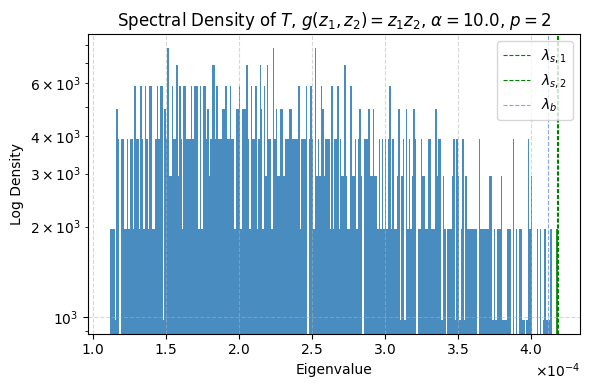

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv as besselk
from scipy.linalg import eigh
from matplotlib.ticker import ScalarFormatter


def compute_T_y_bessel(y_batch):
    abs_y = np.abs(y_batch)
    K1 = besselk(1, abs_y)
    K0 = besselk(0, abs_y)
    with np.errstate(divide='ignore', invalid='ignore'):
        lambda_y = abs_y * (K1 / K0)
        lambda_y[np.isnan(lambda_y)] = 0.0
        lambda_y[np.isinf(lambda_y)] = 0.0

    T_list = []
    for i in range(len(y_batch)):
        y_i = y_batch[i]
        lam = lambda_y[i]
        G = np.array([[lam, y_i],
                      [y_i, lam]])
        T_i = G @ np.linalg.inv(G + np.eye(2))
        T_list.append(T_i)
    return np.array(T_list)  # shape: (n, 2, 2)


def build_T_hat(X, T_y):
    n, d = X.shape
    T_matrix = np.zeros((2 * d, 2 * d))
    for i in range(n):
        xi = X[i]  # (d,)
        Ti = T_y[i]  # (2,2)
        A = np.outer(xi, xi)  # (d,d)

        # 手动构造 Kronecker 加和
        T_matrix[0:d, 0:d]     += Ti[0, 0] * A
        T_matrix[0:d, d:2*d]   += Ti[0, 1] * A
        T_matrix[d:2*d, 0:d]   += Ti[1, 0] * A
        T_matrix[d:2*d, d:2*d] += Ti[1, 1] * A
    T_matrix /= n
    return T_matrix


def plot_spectrum(eigvals, alpha, p, signal_top=2, lambda_s=None, lambda_b=None, save_path=None):
    bulk_color = '#2878B5'
    signal_color = 'green'

    # Histogram
    hist, bin_edges = np.histogram(eigvals, bins=300, density=True)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # 获取前 signal_top 个最大特征值
    eigvals_sorted = np.sort(eigvals)
    signal_eigs = eigvals_sorted[-signal_top:]

    # 用距离最近的 bin_center 定位要染色的 bin
    signal_bins = []
    for eig in signal_eigs:
        idx = np.argmin(np.abs(bin_centers - eig))
        signal_bins.append(idx)

    # Plotting
    plt.figure(figsize=(6, 4))
    for i in range(len(hist)):
        color = signal_color if i in signal_bins else bulk_color
        plt.bar(bin_centers[i], hist[i], width=bin_width, color=color, alpha=0.85)

    # 添加特征值竖线
    if lambda_s is not None:
        lambda_s = np.atleast_1d(lambda_s)
        for idx, val in enumerate(lambda_s):
            plt.axvline(val, color='green', linestyle='--', linewidth=0.8,
                        label=r'$\lambda_{s,%d}$' % (idx + 1))

    if lambda_b is not None:
        lambda_b = np.atleast_1d(lambda_b)
        for idx, val in enumerate(lambda_b):
            plt.axvline(val, color='#85A7E7', linestyle='--', linewidth=0.8,
                        label=r'$\lambda_b$' if idx == 0 else None)

    # y-log scale
    plt.yscale('log')
    plt.title(r"Spectral Density of $T$, $g(z_1,z_2) = z_1 z_2$, $\alpha = {:.1f}$, $p = {}$".format(alpha, p))
    plt.xlabel("Eigenvalue")
    plt.ylabel("Log Density")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

    # 美化
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()



def main():
    # 参数设置
    d = 500
    p = 2
    alpha = 10
    n = int(d * alpha)
    np.random.seed(42)

    # Step 1-4: 生成数据
    W_star = np.random.randn(d, p)
    W_star, _ = np.linalg.qr(W_star)
    X = np.random.randn(n, d) / np.sqrt(d)
    Z = X @ W_star
    z1, z2 = Z[:, 0], Z[:, 1]
    y = z1 * z2

    # Step 5-6: 构造 T(y) 和 T_hat
    T_y = compute_T_y_bessel(y)
    T_hat = build_T_hat(X, T_y)

    # Step 7: 特征分解
    eigvals = eigh(T_hat, eigvals_only=True)

    # Step 7.5: 估计 bulk 边界（经验值）
    bulk_edge = np.quantile(eigvals, 0.995)

    # Step 8: 绘图
    plot_spectrum(
        eigvals,
        alpha=alpha,
        p=p,
        signal_top=2,
        lambda_s=eigvals[-2:],    # 最大两个特征值
        lambda_b=[bulk_edge],     # 经验谱边界
        save_path='spectrum_plot.png'
    )


if __name__ == "__main__":
    main()
